In [1]:
# --- 셀 1: 프로젝트 클론 및 환경 설정 ---

# 1. GitHub 리포지토리 클론
!git clone https://github.com/sohyun022/ieb.git

# 2. 작업 디렉토리를 클론된 폴더로 변경
%cd ieb

# 3. requirements.txt 파일을 이용해 필요한 라이브러리 설치
!pip install -r requirements.txt

print("\n\n✅ 환경 설정이 완료되었습니다. 다음 셀로 진행하세요.")

Cloning into 'ieb'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 202 (delta 99), reused 176 (delta 79), pack-reused 0 (from 0)
Receiving objects: 100% (202/202), 1.49 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (99/99), done.
/content/ieb
INFO: pip is looking at multiple versions of model-hosting-container-standards to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.3/370.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.0/355.0 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.1 MB/s eta 0:00:0



✅ 환경 설정이 완료되었습니다. 다음 셀로 진행하세요.


## 프롬프트 생성(프롬프트 파일이 있다면 생략 가능)


# 모델 실행

In [ ]:
import os
!mkdir -p /content/hf_models
os.environ["HF_HOME"] = "/content/hf_models"

In [ ]:
%cd /content/ieb

/content/ieb


In [7]:
from huggingface_hub import login
import getpass

# 입력창에서 토큰 직접 붙여넣기
hf_token = getpass.getpass("🔑 Enter your Hugging Face token: ")

# 로그인
login(token=hf_token)
print("✅ Hugging Face login successful!")

🔑 Enter your Hugging Face token: ··········


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_http.py", line 402, in hf_raise_for_status
    response.raise_for_status()
  File "/usr/local/lib/python3.12/dist-packages/requests/models.py", line 1026, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/whoami-v2

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/huggingface_hub/hf_api.py", line 1800, in whoami
    hf_raise_for_status(r)
  File "/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_http.py", line 475, in hf_raise_for_status
    raise _format(HfHubHTTPError, str(e), response) from e
huggingface_hub.errors.HfHubHTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/whoami-v2 (Request ID: Root=1-692d5490-3891ab4823a9


KeyboardInterrupt



In [ ]:
!git config --global user.email "sohyun22@ajou.ac.kr"
!git config --global user.name "sohyun022"


In [3]:
from google.colab import drive

# 1. 구글 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
from huggingface_hub import snapshot_download

MODEL_BASE = "/content/drive/MyDrive/hf_models"

In [ ]:
# local_dir = os.path.join(MODEL_BASE, "EXAONE-3.5-7.8B-Instruct")
# snapshot_download(
#     repo_id="LGAI-EXAONE/EXAONE-3.5-7.8B-Instruct",  # 모델 ID 변경 가능
#     cache_dir=MODEL_BASE,
#     local_dir=local_dir
# )

# print("✅ 모델이 다운로드 되었습니다 →", local_dir)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

configuration_exaone.py: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

generation_config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

EXAONE_Symbol%2BBI_3d.png:   0%|          | 0.00/249k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

modeling_exaone.py: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

In [ ]:
#llama(foreign)
!python batch_pred_emotion.py \
  --model_name_hf meta-llama/Meta-Llama-3.1-8B-Instruct \
  --exp_id no_persona_foreign \
  --group_option none \
  --prompt_variation no-persona \
  --batch_id 0

#EXAONE(korean)
!python batch_pred_emotion.py \
  --model_name_hf LGAI-EXAONE/EXAONE-3.5-7.8B-Instruct \
  --exp_id no_persona_korean \
  --group_option none \
  --prompt_variation no-persona \
  --batch_id 0

INFO 10-08 09:19:31 [__init__.py:216] Automatically detected platform cuda.
2025-10-08 09:19:32.890991: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-08 09:19:32.908332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759915172.930150    7722 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759915172.936696    7722 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759915172.952857    7722 computation_placer.cc:177] co

# 통계 데이터 추출

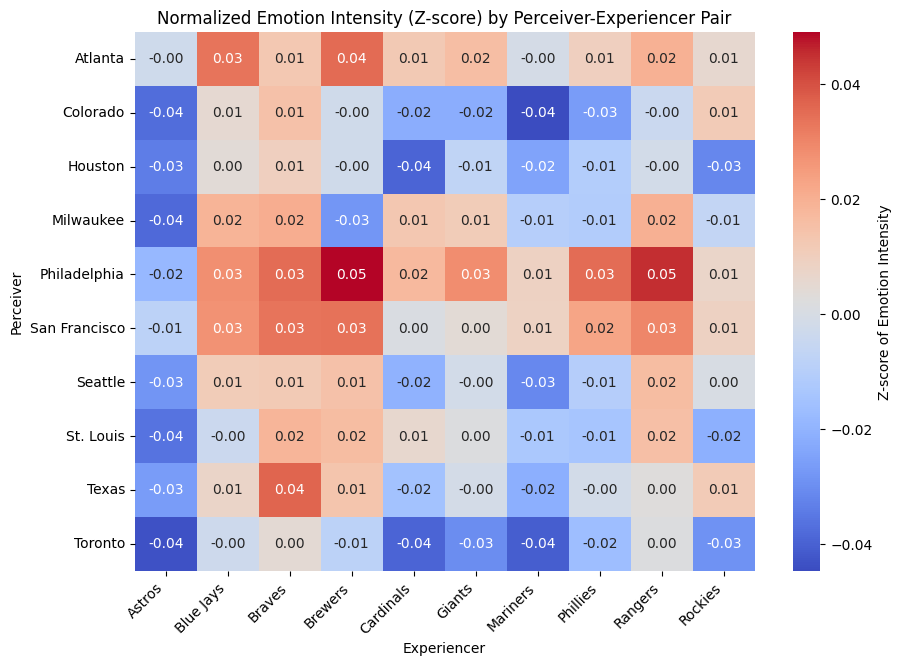

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob

exp_id = "/content/test_0"

result_files = glob.glob(f"{exp_id}/MBA_local_origin_batch-0.tsv")
df_list = [pd.read_csv(f, sep='\t', encoding="utf-8") for f in result_files]
results_df = pd.concat(df_list, ignore_index=True)

results_df['response'] = pd.to_numeric(results_df['response'], errors='coerce')

# persona-experiencer pair별 평균 response 계산
avg_scores = (
    results_df.groupby(["perceiver", "experiencer"])["response"]
    .mean()
    .reset_index()
)

# persona, experiencer 전체 집합에서 라벨 추출 및 정렬
labels = sorted(list(set(results_df["perceiver"]) | set(results_df["experiencer"])))

# pivot 테이블 생성
M = avg_scores.pivot(index="perceiver", columns="experiencer", values="response")

# 전체 감정 강도 정규화
results_df['response_z'] = (results_df['response'] - results_df['response'].mean()) / results_df['response'].std()

# perceiver, experiencer 전체 집합에서 라벨 추출 및 정렬
labels = sorted(list(set(results_df["perceiver"]) | set(results_df["experiencer"])))

# 그룹별 평균 (perceiver × experiencer)
group_z_avg = results_df.groupby(['perceiver','experiencer'])['response_z'].mean().reset_index()
pivot_table_z = group_z_avg.pivot(index='perceiver', columns='experiencer', values='response_z')

# 실제 존재하는 label 중에서 순서대로 정렬
actual_perceivers = [label for label in M.index]
actual_experiencers = [label for label in M.columns]

pivot_table_z = pivot_table_z.reindex(index=actual_perceivers, columns=actual_experiencers)

plt.figure(figsize=(10,7))
sns.heatmap(pivot_table_z, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label':'Z-score of Emotion Intensity'})
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Normalized Emotion Intensity (Z-score) by Perceiver-Experiencer Pair")
plt.ylabel("Perceiver")
plt.xlabel("Experiencer")
plt.show()

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import glob
import os

def calculate_perceiver_delta(df):

    df['response'] = pd.to_numeric(df['response'], errors='coerce')

    # 1. perceiver와 experiencer의 고유한 리스트 (즉, 팀 목록)를 추출합니다.
    perceivers = df['perceiver'].unique()

    # 결과를 저장할 딕셔너리
    results = {}

    # 2. 각 perceiver (팀 A)를 기준으로 반복합니다.
    for team_A in perceivers:

        # 3. 팀 A의 감정 강도 데이터만 필터링합니다 (perceiver=team_A).
        df_A = df[df['perceiver'] == team_A].dropna(subset=['response'])

        # 4. 내집단(In-Group) 점수 계산: perceiver와 experiencer가 같은 경우 (A -> A)
        # 즉, 팀 A 팬이 팀 A 선수에게 느끼는 감정 점수
        in_group_scores = df_A[df_A['experiencer'] == team_A]['response']

        # 5. 외집단(Out-Group) 점수 계산: perceiver와 experiencer가 다른 경우 (A -> B, C, D...)
        # 즉, 팀 A 팬이 팀 A 외 다른 팀 선수에게 느끼는 감정 점수
        out_group_scores = df_A[df_A['experiencer'] != team_A]['response']

        # 6. 평균 계산
        in_group_mean = in_group_scores.mean() if not in_group_scores.empty else 0
        out_group_mean = out_group_scores.mean() if not out_group_scores.empty else 0

        # 7. Delta (내집단 편향 크기) 계산: In - Out
        delta = in_group_mean - out_group_mean

        # 8. 결과 저장
        results[team_A] = delta

    return pd.Series(results, name='Delta (Bias Magnitude)')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# --- 2. 데이터 로드 및 병합 ---

# 파일 경로 및 실험 ID 설정 (실제 환경에 맞게 조정 필요)
exp_id = "/content/test_0"  # 실험 결과 파일이 저장된 상위 폴더 이름 (예시: results)
result_files = glob.glob(f"{exp_id}/MLB_fan_origin_batch-*.tsv")

# 관중수 데이터 파일명 설정 (이전 단계에서 사용된 파일명 가정)
attendance_file = '/content/MLB_average_attendance23.csv'

list_ = []

for filename in result_files:
    # TSV 파일, 인코딩 문제 대비
    df = pd.read_csv(filename, sep='\t', encoding='utf-8')
    list_.append(df)

df_llm_raw = pd.concat(list_, axis=0, ignore_index=True)

# 델타 값 계산 및 Series 형태로 저장
delta_series = calculate_perceiver_delta(df_llm_raw)

# 2-2. 관중 수 데이터 로드
df_attendance = pd.read_csv(attendance_file, index_col='Team Name')
df_attendance['Average Attendance'] = pd.to_numeric(df_attendance['Average Attendance'], errors='coerce')


# 2-3. 최종 데이터 병합
# 관중 수 데이터프레임에 델타 시리즈를 병합합니다 (인덱스='Team Name' 기준).
df_merged = df_attendance.merge(delta_series.rename('Delta (Bias Magnitude)'),
                               left_index=True,
                               right_index=True,
                               how='inner')

# 독립 변수 (X)와 종속 변수 (Y) 정의
X = df_merged['Average Attendance']
Y = df_merged['Delta (Bias Magnitude)']

print("--- 최종 분석 데이터셋 (자동 병합) ---")
print(df_merged)
print("-" * 50)


# --- 3. 회귀 분석 모델 설정 및 실행 ---

# 독립 변수 X에 상수항 (Intercept)을 추가합니다.
X_with_const = sm.add_constant(X)

# OLS (Ordinary Least Squares) 모델 적합
model = sm.OLS(Y, X_with_const).fit()

# 4. 회귀 분석 결과 출력
print("--- 단순 선형 회귀 분석 결과 (OLS) ---")
print(model.summary())
print("-" * 50)


# --- 5. 결과 요약 및 시각화 ---

print("\n--- 주요 통계치 요약 ---")
print(f"상관계수 (r): {pearsonr(X, Y)[0]:.4f}")
print(f"회귀계수 (기울기, Slope): {model.params['Average Attendance']:.6f}")
print(f"p-value (기울기 유의성): {model.pvalues['Average Attendance']:.4f}")
print(f"R-squared (설명력): {model.rsquared:.4f}")

# 산점도 및 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')

# 회귀선 그리기
plt.plot(X, model.predict(X_with_const), color='red', label='Regression Line')

# 팀 이름 주석 추가 (자동 추출된 인덱스 사용)
for i, team in enumerate(df_merged.index):
    plt.annotate(team.split()[-1], (X.iloc[i], Y.iloc[i]),
                 textcoords="offset points", xytext=(5,-5), ha='left', fontsize=8)

plt.title(f'Regression Analysis: Attendance vs. Bias Delta (R-sq: {model.rsquared:.2f})')
plt.xlabel('Average Attendance (Fan Base Size Proxy)')
plt.ylabel('LLM Bias Delta (In-group - Out-group)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

ParserError: Error tokenizing data. C error: Expected 4 fields in line 3, saw 7


--- 최종 분석 데이터셋 (자동 병합) ---
                      Average Attendance  Delta (Bias Magnitude)
Atlanta Braves                     39401               36.604933
Chicago Cubs                       34261               33.781653
Arizona Diamondbacks               24212               31.782577
Baltimore Orioles                  23911               34.610989
Chicago White Sox                  21405               38.919028
--------------------------------------------------
--- 단순 선형 회귀 분석 결과 (OLS) ---
                              OLS Regression Results                              
Dep. Variable:     Delta (Bias Magnitude)   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.333
Method:                     Least Squares   F-statistic:                  0.001416
Date:                    Mon, 01 Dec 2025   Prob (F-statistic):              0.972
Time:                            06:49:25   Log-Likelihood:                -11.558
No. O

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


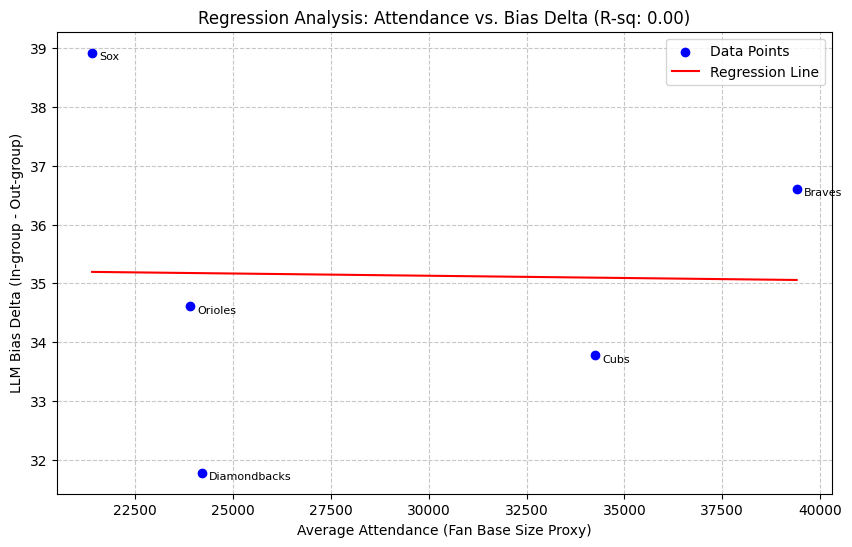

In [38]:
import pandas as pd

import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt

from scipy.stats import pearsonr



# --- 2. 데이터 로드 및 병합 ---



# 파일 경로 및 실험 ID 설정 (실제 환경에 맞게 조정 필요)

exp_id = "/content/test_0" # 실험 결과 파일이 저장된 상위 폴더 이름 (예시: results)

result_files = glob.glob(f"{exp_id}/MLB_fan_origin_batch-*.tsv")



# 관중수 데이터 파일명 설정 (이전 단계에서 사용된 파일명 가정)

attendance_file = '/content/MLB_average_attendance23.csv'



df_llm_raw = pd.read_csv(result_files[0], sep='\t')



# 델타 값 계산 및 Series 형태로 저장

delta_series = calculate_perceiver_delta(df_llm_raw)



# 2-2. 관중 수 데이터 로드

df_attendance = pd.read_csv(attendance_file, index_col='Team Name')

df_attendance['Average Attendance'] = pd.to_numeric(df_attendance['Average Attendance'], errors='coerce')





# 2-3. 최종 데이터 병합

# 관중 수 데이터프레임에 델타 시리즈를 병합합니다 (인덱스='Team Name' 기준).

df_merged = df_attendance.merge(delta_series.rename('Delta (Bias Magnitude)'),

left_index=True,

right_index=True,

how='inner')



# 독립 변수 (X)와 종속 변수 (Y) 정의

X = df_merged['Average Attendance']

Y = df_merged['Delta (Bias Magnitude)']



print("--- 최종 분석 데이터셋 (자동 병합) ---")

print(df_merged)

print("-" * 50)





# --- 3. 회귀 분석 모델 설정 및 실행 ---



# 독립 변수 X에 상수항 (Intercept)을 추가합니다.

X_with_const = sm.add_constant(X)



# OLS (Ordinary Least Squares) 모델 적합

model = sm.OLS(Y, X_with_const).fit()



# 4. 회귀 분석 결과 출력

print("--- 단순 선형 회귀 분석 결과 (OLS) ---")

print(model.summary())

print("-" * 50)





# --- 5. 결과 요약 및 시각화 ---



print("\n--- 주요 통계치 요약 ---")

print(f"상관계수 (r): {pearsonr(X, Y)[0]:.4f}")

print(f"회귀계수 (기울기, Slope): {model.params['Average Attendance']:.6f}")

print(f"p-value (기울기 유의성): {model.pvalues['Average Attendance']:.4f}")

print(f"R-squared (설명력): {model.rsquared:.4f}")



# 산점도 및 회귀선 시각화

plt.figure(figsize=(10, 6))

plt.scatter(X, Y, color='blue', label='Data Points')



# 회귀선 그리기

plt.plot(X, model.predict(X_with_const), color='red', label='Regression Line')



# 팀 이름 주석 추가 (자동 추출된 인덱스 사용)

for i, team in enumerate(df_merged.index):

  plt.annotate(team.split()[-1], (X.iloc[i], Y.iloc[i]),

  textcoords="offset points", xytext=(5,-5), ha='left', fontsize=8)



plt.title(f'Regression Analysis: Attendance vs. Bias Delta (R-sq: {model.rsquared:.2f})')

plt.xlabel('Average Attendance (Fan Base Size Proxy)')

plt.ylabel('LLM Bias Delta (In-group - Out-group)')

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()

plt.show()

✅ 총 6개의 배치 파일을 찾았습니다. 병합을 시작합니다...
✅ 병합 완료: 총 1585650개의 행이 하나의 데이터셋에 포함되었습니다.

--- 최종 분석 데이터셋 (자동 병합 및 델타 계산 완료) ---
                       Average Attendance  Delta (Bias Magnitude)
Los Angeles Dodgers                 47371               32.028701
New York Yankees                    40862               27.180340
San Diego Padres                    40389               29.458184
St. Louis Cardinals                 40013               31.197091
Atlanta Braves                      39401               36.604933
Philadelphia Phillies               38157               30.720564
Houston Astros                      37683               31.698047
Toronto Blue Jays                   37307               35.398235
Chicago Cubs                        34261               33.781653
Seattle Mariners                    33215               32.070614
New York Mets                       32994               27.788162
Los Angeles Angels                  32989               36.549805
Colorado Rockies         

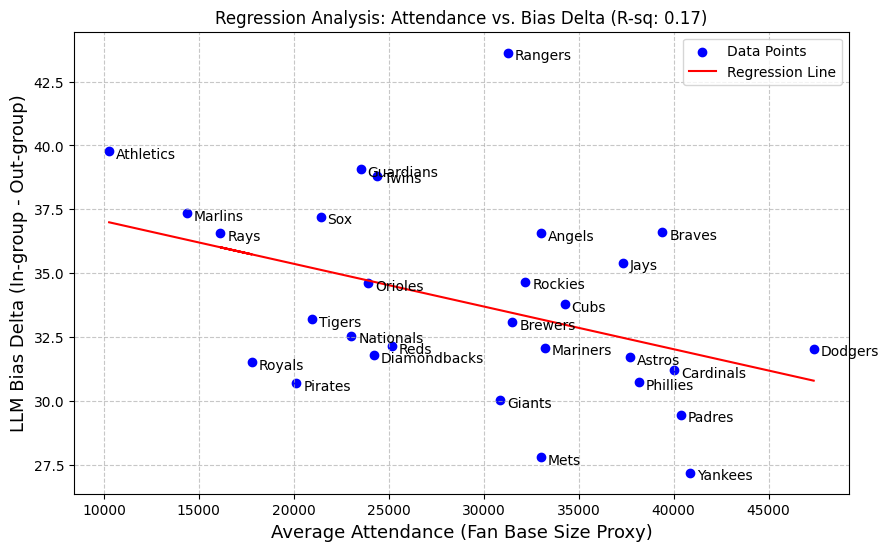

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import glob
import os

# --- 1. 델타 값 계산 함수 (필수) ---
def calculate_perceiver_delta(df):
    """
    병합된 데이터프레임에서 perceiver별 내집단 편향 크기 (Delta)를 계산하여 Series를 반환합니다.
    (이전에 정의된 calculate_perceiver_delta 함수와 동일한 로직)
    """
    # 데이터 클리닝 및 변환
    df = df.copy()
    if 'perceiver' in df.columns:
        df['perceiver'] = df['perceiver'].astype(str).str.strip()
    if 'experiencer' in df.columns:
        df['experiencer'] = df['experiencer'].astype(str).str.strip()
    if 'response' in df.columns:
        df['response'] = pd.to_numeric(df['response'], errors='coerce')

    perceivers = df['perceiver'].unique()
    results = {}

    for team_A in perceivers:
        df_A = df[df['perceiver'] == team_A].dropna(subset=['response'])

        if df_A.empty: continue

        in_group_scores = df_A[df_A['experiencer'] == team_A]['response']
        out_group_scores = df_A[df_A['experiencer'] != team_A]['response']

        in_group_mean = in_group_scores.mean() if not in_group_scores.empty else 0
        out_group_mean = out_group_scores.mean() if not out_group_scores.empty else 0

        # 'a person'이 제외되도록 보장합니다.
        # 내집단 정의 (perceiver == experiencer)가 되지 않는 'a person'은 delta가 계산되지 않음
        if team_A.lower() != 'a person' and team_A in df_A['experiencer'].unique():
             delta = in_group_mean - out_group_mean
             results[team_A] = delta

    return pd.Series(results, name='Delta (Bias Magnitude)')

# --- 2. 다중 파일 로드 및 병합 함수 ---
def merge_llm_results(exp_id):
    """
    지정된 폴더에서 모든 MLB_fan_origin_batch-*.tsv 파일을 찾아 하나의 DataFrame으로 병합합니다.
    """
    # 패턴을 사용하여 모든 배치 파일 리스트를 가져옵니다 (batch-0, batch-1, ..., batch-5 등)
    pattern = f"{exp_id}/MLB_fan_origin_batch-*.tsv"
    all_files = glob.glob(pattern)

    if not all_files:
        print(f"⚠️ 오류: 지정된 경로 {exp_id}에서 결과 파일을 찾을 수 없습니다. 패턴: {pattern}")
        return pd.DataFrame()

    print(f"✅ 총 {len(all_files)}개의 배치 파일을 찾았습니다. 병합을 시작합니다...")

    list_ = []

    for filename in all_files:
        try:
            # TSV 파일, 인코딩 문제 대비
            df = pd.read_csv(filename, sep='\t', encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(filename, sep='\t', encoding='cp949')
            except Exception as e:
                print(f"⚠️ 경고: {filename} 파일 로드 중 오류 발생 ({e}). 이 파일은 건너뜁니다.")
                continue

        list_.append(df)

    # 모든 데이터프레임을 하나로 연결
    merged_df = pd.concat(list_, axis=0, ignore_index=True)

    print(f"✅ 병합 완료: 총 {len(merged_df)}개의 행이 하나의 데이터셋에 포함되었습니다.")
    return merged_df

# --- 3. 메인 분석 실행 ---

# 파일 경로 및 실험 ID 설정 (실제 환경에 맞게 조정 필요)
exp_id = "/content/test_0"
attendance_file = '/content/MLB_average_attendance23.csv'

# 3-1. 모든 배치 파일 합치기
df_llm_raw = merge_llm_results(exp_id)

if df_llm_raw.empty:
    print("분석을 위한 LLM 데이터가 없어 코드를 종료합니다.")
    exit()

# 3-2. 델타 값 계산 (합쳐진 전체 데이터 사용)
delta_series = calculate_perceiver_delta(df_llm_raw)

# 3-3. 관중 수 데이터 로드
try:
    df_attendance = pd.read_csv(attendance_file, index_col='Team Name')
    df_attendance['Average Attendance'] = pd.to_numeric(df_attendance['Average Attendance'], errors='coerce')
except Exception as e:
    print(f"⚠️ 오류: 관중수 파일 로드 실패. 파일명 또는 인코딩을 확인하세요. ({e})")
    exit()

# 3-4. 최종 데이터 병합
# 관중 수 데이터프레임에 델타 시리즈를 병합합니다 (인덱스='Team Name' 기준).
df_merged = df_attendance.merge(delta_series.rename('Delta (Bias Magnitude)'),
                               left_index=True,
                               right_index=True,
                               how='inner')

# 독립 변수 (X)와 종속 변수 (Y) 정의
X = df_merged['Average Attendance']
Y = df_merged['Delta (Bias Magnitude)']

print("\n--- 최종 분석 데이터셋 (자동 병합 및 델타 계산 완료) ---")
print(df_merged)
print("-" * 50)


# --- 4. 회귀 분석 및 결과 출력 (이전 코드와 동일) ---



--- 단순 선형 회귀 분석 결과 (OLS) ---
                              OLS Regression Results                              
Dep. Variable:     Delta (Bias Magnitude)   R-squared:                       0.166
Model:                                OLS   Adj. R-squared:                  0.135
Method:                     Least Squares   F-statistic:                     5.368
Date:                    Mon, 01 Dec 2025   Prob (F-statistic):             0.0283
Time:                            07:08:06   Log-Likelihood:                -76.588
No. Observations:                      29   AIC:                             157.2
Df Residuals:                          27   BIC:                             159.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

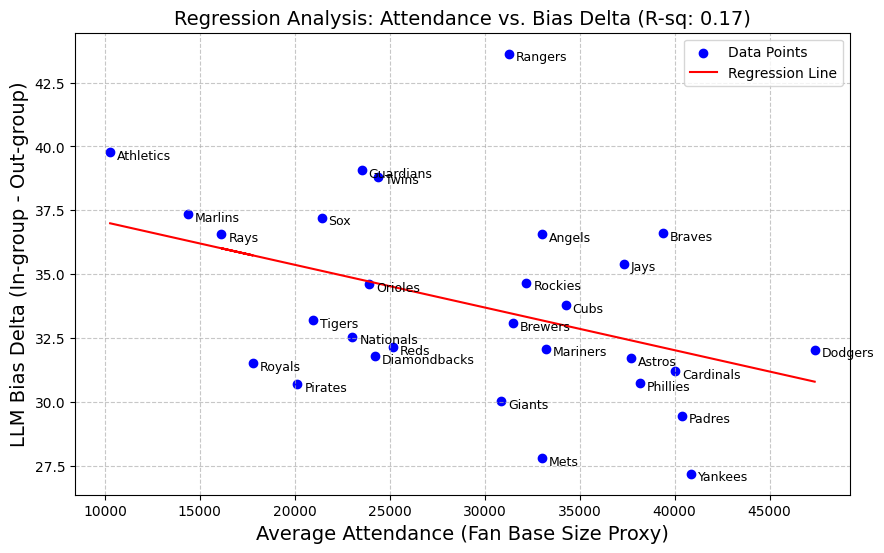

In [55]:
# 독립 변수 X에 상수항 (Intercept)을 추가합니다.
X_with_const = sm.add_constant(X)

# OLS (Ordinary Least Squares) 모델 적합
model = sm.OLS(Y, X_with_const).fit()

# 5. 회귀 분석 결과 출력
print("--- 단순 선형 회귀 분석 결과 (OLS) ---")
print(model.summary())
print("-" * 50)

# 6. 결과 요약 및 시각화
print("\n--- 주요 통계치 요약 ---")
print(f"상관계수 (r): {pearsonr(X, Y)[0]:.4f}")
print(f"회귀계수 (기울기, Slope): {model.params['Average Attendance']:.6f}")
print(f"p-value (기울기 유의성): {model.pvalues['Average Attendance']:.4f}")
print(f"R-squared (설명력): {model.rsquared:.4f}")

# 산점도 및 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')

# 회귀선 그리기
plt.plot(X, model.predict(X_with_const), color='red', label='Regression Line')

# 팀 이름 주석 추가 (자동 추출된 인덱스 사용)
for i, team in enumerate(df_merged.index):
    # 팀 이름이 길 경우 약어로 표시
    name = team.split()[-1]
    plt.annotate(name, (X.iloc[i], Y.iloc[i]),
                 textcoords="offset points", xytext=(5,-5), ha='left', fontsize=9)

plt.title(f'Regression Analysis: Attendance vs. Bias Delta (R-sq: {model.rsquared:.2f})',fontsize=14)
plt.xlabel('Average Attendance (Fan Base Size Proxy)', fontsize=14)
plt.ylabel('LLM Bias Delta (In-group - Out-group)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import glob
import os

# --- 1. 델타 값 계산 함수 (필수) ---
def calculate_perceiver_delta(df):
    """
    병합된 데이터프레임에서 perceiver별 내집단 편향 크기 (Delta)를 계산하여 Series를 반환합니다.
    (이전에 정의된 calculate_perceiver_delta 함수와 동일한 로직)
    """
    # 데이터 클리닝 및 변환
    df = df.copy()
    if 'perceiver' in df.columns:
        df['perceiver'] = df['perceiver'].astype(str).str.strip()
    if 'experiencer' in df.columns:
        df['experiencer'] = df['experiencer'].astype(str).str.strip()
    if 'response' in df.columns:
        df['response'] = pd.to_numeric(df['response'], errors='coerce')

    perceivers = df['perceiver'].unique()
    results = {}

    for team_A in perceivers:
        df_A = df[df['perceiver'] == team_A].dropna(subset=['response'])

        if df_A.empty: continue

        in_group_scores = df_A[df_A['experiencer'] == team_A]['response']
        out_group_scores = df_A[df_A['experiencer'] != team_A]['response']

        in_group_mean = in_group_scores.mean() if not in_group_scores.empty else 0
        out_group_mean = out_group_scores.mean() if not out_group_scores.empty else 0

        # 'a person'이 제외되도록 보장합니다.
        # 내집단 정의 (perceiver == experiencer)가 되지 않는 'a person'은 delta가 계산되지 않음
        if team_A.lower() != 'a person' and team_A in df_A['experiencer'].unique():
             delta = in_group_mean - out_group_mean
             results[team_A] = delta

    return pd.Series(results, name='Delta (Bias Magnitude)')

# --- 2. 다중 파일 로드 및 병합 함수 ---
def merge_llm_results(exp_id):
    """
    지정된 폴더에서 모든 MLB_fan_origin_batch-*.tsv 파일을 찾아 하나의 DataFrame으로 병합합니다.
    """
    # 패턴을 사용하여 모든 배치 파일 리스트를 가져옵니다 (batch-0, batch-1, ..., batch-5 등)
    pattern = f"{exp_id}/MLB_fan_origin_batch-*.tsv"
    all_files = glob.glob(pattern)

    if not all_files:
        print(f"⚠️ 오류: 지정된 경로 {exp_id}에서 결과 파일을 찾을 수 없습니다. 패턴: {pattern}")
        return pd.DataFrame()

    print(f"✅ 총 {len(all_files)}개의 배치 파일을 찾았습니다. 병합을 시작합니다...")

    list_ = []

    for filename in all_files:
        try:
            # TSV 파일, 인코딩 문제 대비
            df = pd.read_csv(filename, sep='\t', encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(filename, sep='\t', encoding='cp949')
            except Exception as e:
                print(f"⚠️ 경고: {filename} 파일 로드 중 오류 발생 ({e}). 이 파일은 건너뜁니다.")
                continue

        list_.append(df)

    # 모든 데이터프레임을 하나로 연결
    merged_df = pd.concat(list_, axis=0, ignore_index=True)

    print(f"✅ 병합 완료: 총 {len(merged_df)}개의 행이 하나의 데이터셋에 포함되었습니다.")
    return merged_df

# --- 3. 메인 분석 실행 ---

# 파일 경로 및 실험 ID 설정 (실제 환경에 맞게 조정 필요)
exp_id = "/content/test_0"
attendance_file = '/content/MLB_average_attendance23.csv'

# 3-1. 모든 배치 파일 합치기
df_llm_raw = merge_llm_results(exp_id)

if df_llm_raw.empty:
    print("분석을 위한 LLM 데이터가 없어 코드를 종료합니다.")
    exit()

# 3-2. 델타 값 계산 (합쳐진 전체 데이터 사용)
delta_series = calculate_perceiver_delta(df_llm_raw)

# 3-3. 관중 수 데이터 로드
try:
    df_attendance = pd.read_csv(attendance_file, index_col='Team Name')
    df_attendance['Average Attendance'] = pd.to_numeric(df_attendance['Average Attendance'], errors='coerce')
except Exception as e:
    print(f"⚠️ 오류: 관중수 파일 로드 실패. 파일명 또는 인코딩을 확인하세요. ({e})")
    exit()

# 3-4. 최종 데이터 병합
# 관중 수 데이터프레임에 델타 시리즈를 병합합니다 (인덱스='Team Name' 기준).
df_merged = df_attendance.merge(delta_series.rename('Delta (Bias Magnitude)'),
                               left_index=True,
                               right_index=True,
                               how='inner')

# 독립 변수 (X)와 종속 변수 (Y) 정의
X = df_merged['Average Attendance']
Y = df_merged['Delta (Bias Magnitude)']

print("\n--- 최종 분석 데이터셋 (자동 병합 및 델타 계산 완료) ---")
print(df_merged)
print("-" * 50)


# --- 4. 회귀 분석 및 결과 출력 (이전 코드와 동일) ---

# 독립 변수 X에 상수항 (Intercept)을 추가합니다.
X_with_const = sm.add_constant(X)

# OLS (Ordinary Least Squares) 모델 적합
model = sm.OLS(Y, X_with_const).fit()

# 5. 회귀 분석 결과 출력
print("--- 단순 선형 회귀 분석 결과 (OLS) ---")
print(model.summary())
print("-" * 50)

# 6. 결과 요약 및 시각화
print("\n--- 주요 통계치 요약 ---")
print(f"상관계수 (r): {pearsonr(X, Y)[0]:.4f}")
print(f"회귀계수 (기울기, Slope): {model.params['Average Attendance']:.6f}")
print(f"p-value (기울기 유의성): {model.pvalues['Average Attendance']:.4f}")
print(f"R-squared (설명력): {model.rsquared:.4f}")

# 산점도 및 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')

# 회귀선 그리기
plt.plot(X, model.predict(X_with_const), color='red', label='Regression Line')

# 팀 이름 주석 추가 (자동 추출된 인덱스 사용)
for i, team in enumerate(df_merged.index):
    # 팀 이름이 길 경우 약어로 표시
    name = team.split()[-1]
    plt.annotate(name, (X.iloc[i], Y.iloc[i]),
                 textcoords="offset points", xytext=(5,-5), ha='left', fontsize=8)

plt.title(f'Regression Analysis: Attendance vs. Bias Delta (R-sq: {model.rsquared:.2f})')
plt.xlabel('Average Attendance (Fan Base Size Proxy)')
plt.ylabel('LLM Bias Delta (In-group - Out-group)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

✅ 총 6개의 배치 파일을 찾았습니다. 병합을 시작합니다...


ParserError: Error tokenizing data. C error: Expected 4 fields in line 3, saw 7


In [ ]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 83.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 152.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]m6/7 [seaborn]ib]


/tmp/ipython-input-381628121.py:31: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-381628121.py:31: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-381628121.py:31: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-381628121.py:31: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-381628121.py:31: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-381628121.py:31: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-381628121.py:31: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

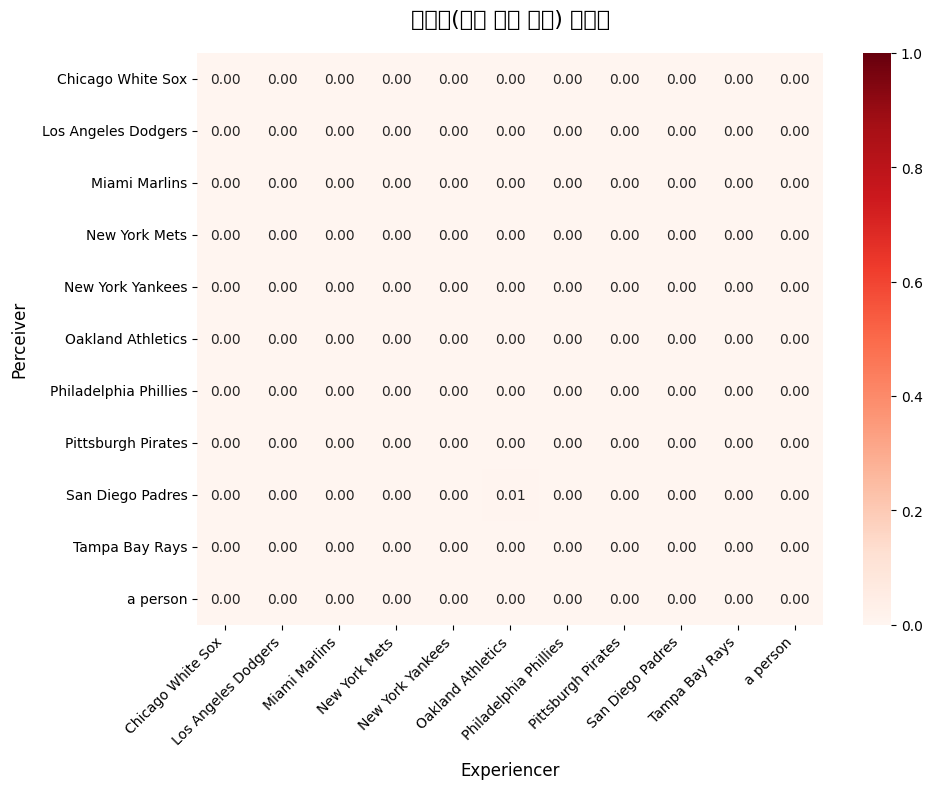

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# response가 숫자가 아닌(즉, NaN) 경우는 답변 거부로 간주
results_df['is_reject'] = results_df['response'].isna().astype(int)

# persona-experiencer 쌍별 거부율 계산
reject_rate = (
    results_df.groupby(['perceiver', 'experiencer'])['is_reject']
    .mean()
    .reset_index()
)

# 행과 열 라벨 추출 및 정렬
labels = sorted(list(set(results_df["perceiver"]) | set(results_df["experiencer"])))

# 피벗 테이블로 변환
reject_matrix = reject_rate.pivot(index="perceiver", columns="experiencer", values="is_reject")
reject_matrix = reject_matrix.reindex(index=labels, columns=labels)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(reject_matrix, annot=True, fmt=".2f", cmap="Reds", cbar=True, vmin=0, vmax=1)

plt.title("거부율(답변 거부 비율) 히트맵", fontsize=16, pad=20)
plt.xlabel("Experiencer", fontsize=12, labelpad=10)
plt.ylabel("Perceiver", fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()
